# IMPORTS

In [1]:
%matplotlib inline

In [8]:
from AxonDeepSeg.visualization.visualize import visualize_training
import json
import os
import matplotlib.pyplot as plt
#from prettytable import PrettyTable
#from ipywidgets.widgets import *

# 1/ Build the dataset for training.

In [3]:
# input data to build the training set
path_data = '../victor/data'
path_my_data = '../victor/my_data/data4'

# output path of training data path
path_training = '../trainingset'

# 2/ Load the config file and train the network

In [4]:
# output path for trained U-Net
path_model = '../models/test/'

# optional input path of a model to initialize the training
#path_model_init = 'network_testing/test_2905'
path_model_init = None

path_configfile = '../models/test/config_network.json'

if not os.path.exists(path_model):
    os.makedirs(path_model)

with open(path_configfile, 'r') as fd:
    config_network = json.loads(fd.read())
    
# OPTIONAL : specify the gpu one wants to use.
gpu_device = 'gpu:0' # or gpu_device = 'gpu:1' these are the only two possible targets for now.

# ENTRAINEMENT DU RESEAU

Uniquement nécessaire si le réseau n'a pas encore été entrainé. Sinon on va juste utiliser le modèle existant dans models

from AxonDeepSeg.train_network import train_model
train_model(path_training, path_model, config_network, path_model_init=None, gpu = gpu_device)

# 3/ Apply the model to segment one image

Check des valeurs des paramètres

In [5]:
print "path my data ", path_my_data, ", path_model ", path_model

path my data  ../victor/my_data/data4 , path_model  ../models/test/


#### Segmentation

In [6]:
from AxonDeepSeg.apply_model import axon_segmentation
axon_segmentation(path_my_data, path_model, config_network)



 ---Start axon segmentation on ../victor/my_data/data4---
hyperparameters detected in the model


/home/GRAMES.POLYMTL.CA/mawab/ads/tf11-ads/local/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


('Input features layer : ', 360)
('Input features layer : ', 300)
('Input features layer : ', 240)
('Input features layer : ', 180)
('Input features layer : ', 120)
('Input features layer : ', 60)
('Layer: ', 0, ' Conv: ', 0, 'Features: ', [1, 10])
('Size:', 5)
('Layer: ', 0, ' Conv: ', 1, 'Features: ', [10, 20])
('Size:', 5)
('Layer: ', 0, ' Conv: ', 2, 'Features: ', [20, 30])
('Size:', 5)
('Layer: ', 1, ' Conv: ', 0, 'Features: ', [30, 40])
('Size:', 5)
('Layer: ', 1, ' Conv: ', 1, 'Features: ', [40, 50])
('Size:', 5)
('Layer: ', 1, ' Conv: ', 2, 'Features: ', [50, 60])
('Size:', 5)
('Layer: ', 2, ' Conv: ', 0, 'Features: ', [60, 70])
('Size:', 5)
('Layer: ', 2, ' Conv: ', 1, 'Features: ', [70, 80])
('Size:', 5)
('Layer: ', 2, ' Conv: ', 2, 'Features: ', [80, 90])
('Size:', 5)
('Layer: ', 3, ' Conv: ', 0, 'Features: ', [90, 100])
('Size:', 5)
('Layer: ', 3, ' Conv: ', 1, 'Features: ', [100, 110])
('Size:', 5)
('Layer: ', 3, ' Conv: ', 2, 'Features: ', [110, 120])
('Size:', 5)
('Layer

In [9]:
import matplotlib.image as mpimg

imorg = plt.imread(path_my_data + '/image.png')
imads = plt.imread(path_my_data + '/AxonDeepSeg.png')

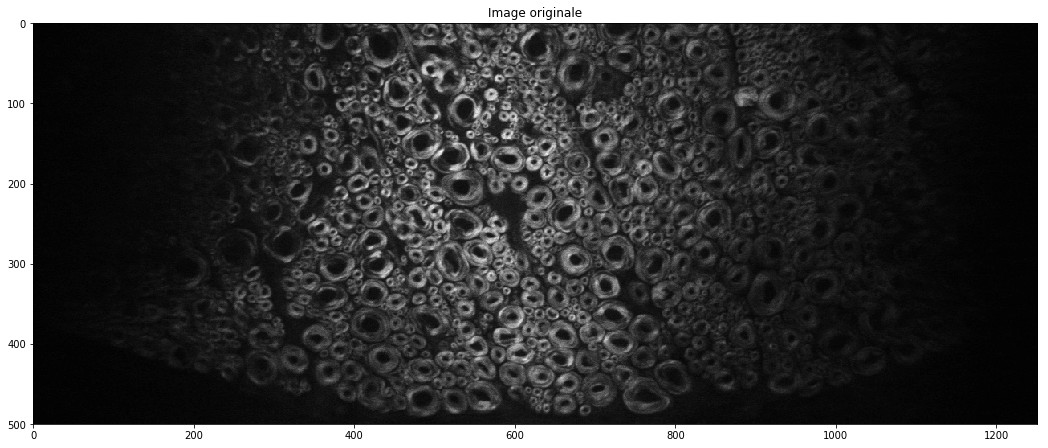

In [10]:
plt.figure(figsize=(18,10))
plt.title('Image originale')
plt.imshow(imorg, cmap='gray')

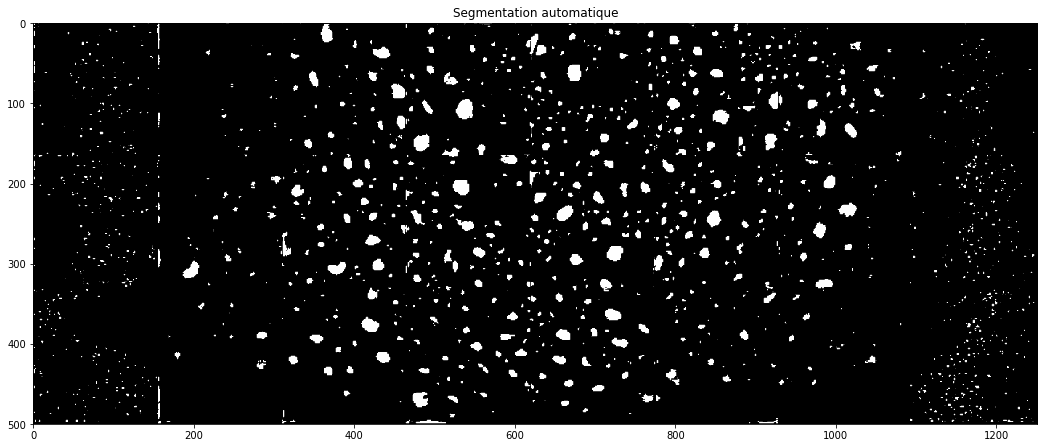

In [12]:
plt.figure(figsize=(18,10))
plt.title('Segmentation automatique')
plt.imshow(imads, cmap='gray')